In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import json

# plt.style.use('dark_background')

from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

%matplotlib inline

# imdb

In [2]:
DATA_PATH = "datasets/tmdb-movie-metadata" 
def load_movies_data(data_path=DATA_PATH):    
    csv_path = os.path.join(data_path, "tmdb_5000_movies.csv")   
    df = pd.read_csv(csv_path)
    df['release_date'] = pd.to_datetime(df['release_date']).apply(lambda x: x.date())
    json_columns = ['genres', 'keywords', 'production_countries', 'production_companies', 'spoken_languages']
    for column in json_columns:
        df[column] = df[column].apply(json.loads)
    return df

def load_credits_data(data_path=DATA_PATH):    
    csv_path = os.path.join(data_path, "tmdb_5000_credits.csv")   
    df = pd.read_csv(csv_path)
    json_columns = ['cast', 'crew']
    for column in json_columns:
        df[column] = df[column].apply(json.loads)
    return df


### File №1

In [3]:
movies = load_movies_data()
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995,"[{'id': 1463, 'name': 'culture clash'}, {'id':...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{'name': 'Ingenious Film Partners', 'id': 289...","[{'iso_3166_1': 'US', 'name': 'United States o...",2009-12-10,2787965087,162.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://disney.go.com/disneypictures/pirates/,285,"[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2007-05-19,961000000,169.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{'id': 470, 'name': 'spy'}, {'id': 818, 'name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",2015-10-26,880674609,148.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",http://www.thedarkknightrises.com/,49026,"[{'id': 849, 'name': 'dc comics'}, {'id': 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{'name': 'Legendary Pictures', 'id': 923}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-07-16,1084939099,165.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://movies.disney.com/john-carter,49529,"[{'id': 818, 'name': 'based on novel'}, {'id':...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-03-07,284139100,132.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [4]:
movies.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [5]:
movies.shape

(4803, 20)

In [6]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null 

### File №2

In [7]:
credits = load_credits_data()
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{'cast_id': 242, 'character': 'Jake Sully', '...","[{'credit_id': '52fe48009251416c750aca23', 'de..."
1,285,Pirates of the Caribbean: At World's End,"[{'cast_id': 4, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4232c3a36847f800b579', 'de..."
2,206647,Spectre,"[{'cast_id': 1, 'character': 'James Bond', 'cr...","[{'credit_id': '54805967c3a36829b5002c41', 'de..."
3,49026,The Dark Knight Rises,"[{'cast_id': 2, 'character': 'Bruce Wayne / Ba...","[{'credit_id': '52fe4781c3a36847f81398c3', 'de..."
4,49529,John Carter,"[{'cast_id': 5, 'character': 'John Carter', 'c...","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de..."


In [8]:
credits.columns

Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')

In [9]:
credits.shape

(4803, 4)

In [10]:
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
movie_id    4803 non-null int64
title       4803 non-null object
cast        4803 non-null object
crew        4803 non-null object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


### Конвертирование двух файлов в один (https://www.kaggle.com/sohier/getting-imdb-kernels-working-with-tmdb-data/)

In [11]:
# Columns that existed in the IMDB version of the dataset and are gone.
LOST_COLUMNS = [
    'actor_1_facebook_likes',
    'actor_2_facebook_likes',
    'actor_3_facebook_likes',
    'aspect_ratio',
    'cast_total_facebook_likes',
    'color',
    'content_rating',
    'director_facebook_likes',
    'facenumber_in_poster',
    'movie_facebook_likes',
    'movie_imdb_link',
    'num_critic_for_reviews',
    'num_user_for_reviews'
                ]

# Columns in TMDb that had direct equivalents in the IMDB version. 
# These columns can be used with old kernels just by changing the names
TMDB_TO_IMDB_SIMPLE_EQUIVALENCIES = {
    'budget': 'budget',
    'genres': 'genres',
    'revenue': 'gross',
    'title': 'movie_title',
    'runtime': 'duration',
    'original_language': 'language',  # it's possible that spoken_languages would be a better match
    'keywords': 'plot_keywords',
    'vote_count': 'num_voted_users',
                                         }

IMDB_COLUMNS_TO_REMAP = {'imdb_score': 'vote_average'}


def safe_access(container, index_values):
    # return a missing value rather than an error upon indexing/key failure
    result = container
    try:
        for idx in index_values:
            result = result[idx]
        return result
    except IndexError or KeyError:
        return pd.np.nan


def get_director(crew_data):
    directors = [x['name'] for x in crew_data if x['job'] == 'Director']
    return safe_access(directors, [0])


def pipe_flatten_names(keywords):
    return '|'.join([x['name'] for x in keywords])


def convert_to_original_format(movies, credits):
    # Converts TMDb data to make it as compatible as possible with kernels built on the original version of the data.
    tmdb_movies = movies.copy()
    tmdb_movies.rename(columns=TMDB_TO_IMDB_SIMPLE_EQUIVALENCIES, inplace=True)
    tmdb_movies['title_year'] = pd.to_datetime(tmdb_movies['release_date']).apply(lambda x: x.year)
    # I'm assuming that the first production country is equivalent, but have not been able to validate this
    tmdb_movies['country'] = tmdb_movies['production_countries'].apply(lambda x: safe_access(x, [0, 'name']))
    tmdb_movies['language'] = tmdb_movies['spoken_languages'].apply(lambda x: safe_access(x, [0, 'name']))
    tmdb_movies['director_name'] = credits['crew'].apply(get_director)
    tmdb_movies['actor_1_name'] = credits['cast'].apply(lambda x: safe_access(x, [0, 'name']))
    tmdb_movies['actor_2_name'] = credits['cast'].apply(lambda x: safe_access(x, [1, 'name']))
    tmdb_movies['actor_3_name'] = credits['cast'].apply(lambda x: safe_access(x, [2, 'name']))
    tmdb_movies['companies_1'] = tmdb_movies['production_companies'].apply(lambda x: safe_access(x, [0, 'name']))
    tmdb_movies['companies_2'] = tmdb_movies['production_companies'].apply(lambda x: safe_access(x, [1, 'name']))
    tmdb_movies['companies_3'] = tmdb_movies['production_companies'].apply(lambda x: safe_access(x, [2, 'name']))
    tmdb_movies['genres'] = tmdb_movies['genres'].apply(pipe_flatten_names)
    tmdb_movies['plot_keywords'] = tmdb_movies['plot_keywords'].apply(pipe_flatten_names)
    return tmdb_movies

In [12]:
movies = load_movies_data()
credits = load_credits_data()
data = convert_to_original_format(movies, credits)
data.head()

,budget,genres,homepage,id,plot_keywords,language,original_title,overview,popularity,production_companies,...,num_voted_users,title_year,country,director_name,actor_1_name,actor_2_name,actor_3_name,companies_1,companies_2,companies_3
0,237000000,Action|Adventure|Fantasy|Science Fiction,http://www.avatarmovie.com/,19995,culture clash|future|space war|space colony|so...,English,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{'name': 'Ingenious Film Partners', 'id': 289...",...,11800,2009.0,United States of America,James Cameron,Sam Worthington,Zoe Saldana,Sigourney Weaver,Ingenious Film Partners,Twentieth Century Fox Film Corporation,Dune Entertainment
1,300000000,Adventure|Fantasy|Action,http://disney.go.com/disneypictures/pirates/,285,ocean|drug abuse|exotic island|east india trad...,English,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...",...,4500,2007.0,United States of America,Gore Verbinski,Johnny Depp,Orlando Bloom,Keira Knightley,Walt Disney Pictures,Jerry Bruckheimer Films,Second Mate Productions
2,245000000,Action|Adventure|Crime,http://www.sonypictures.com/movies/spectre/,206647,spy|based on novel|secret agent|sequel|mi6|bri...,Français,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...",...,4466,2015.0,United Kingdom,Sam Mendes,Daniel Craig,Christoph Waltz,Léa Seydoux,Columbia Pictures,Danjaq,B24
3,250000000,Action|Crime|Drama|Thriller,http://www.thedarkknightrises.com/,49026,dc comics|crime fighter|terrorist|secret ident...,English,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{'name': 'Legendary Pictures', 'id': 923}, {'...",...,9106,2012.0,United States of America,Christopher Nolan,Christian Bale,Michael Caine,Gary Oldman,Legendary Pictures,Warner Bros.,DC Entertainment
4,260000000,Action|Adventure|Science Fiction,http://movies.disney.com/john-carter,49529,based on novel|mars|medallion|space travel|pri...,English,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{'name': 'Walt Disney Pictures', 'id': 2}]",...,2124,2012.0,United States of America,Andrew Stanton,Taylor Kitsch,Lynn Collins,Samantha Morton,Walt Disney Pictures,NaN,NaN


In [13]:
data.columns

Index(['budget', 'genres', 'homepage', 'id', 'plot_keywords', 'language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'gross', 'duration',
       'spoken_languages', 'status', 'tagline', 'movie_title', 'vote_average',
       'num_voted_users', 'title_year', 'country', 'director_name',
       'actor_1_name', 'actor_2_name', 'actor_3_name', 'companies_1',
       'companies_2', 'companies_3'],
      dtype='object')

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 29 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
plot_keywords           4803 non-null object
language                4717 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
gross                   4803 non-null int64
duration                4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
movie_title             4803 non-null object
vote_average            4803 non-null float64
num_voted_users         4803 non-null 

In [15]:
data.shape

(4803, 29)

# Задача классификации: классификация на хороший/плохой фильм

Удалим ненужные данные

In [16]:
unnecessary = ['country','language','movie_title','homepage', 'id', 'plot_keywords', 'spoken_languages', 'tagline','production_countries', 'production_companies', 'release_date', 'status','original_title','overview']
clean_data_set = data.drop(unnecessary, axis=1)

In [17]:
clean_data_set.head(2)

,budget,genres,popularity,gross,duration,vote_average,num_voted_users,title_year,director_name,actor_1_name,actor_2_name,actor_3_name,companies_1,companies_2,companies_3
0,237000000,Action|Adventure|Fantasy|Science Fiction,150.437577,2787965087,162.0,7.2,11800,2009.0,James Cameron,Sam Worthington,Zoe Saldana,Sigourney Weaver,Ingenious Film Partners,Twentieth Century Fox Film Corporation,Dune Entertainment
1,300000000,Adventure|Fantasy|Action,139.082615,961000000,169.0,6.9,4500,2007.0,Gore Verbinski,Johnny Depp,Orlando Bloom,Keira Knightley,Walt Disney Pictures,Jerry Bruckheimer Films,Second Mate Productions


In [18]:
clean_data_set.columns

Index(['budget', 'genres', 'popularity', 'gross', 'duration', 'vote_average',
       'num_voted_users', 'title_year', 'director_name', 'actor_1_name',
       'actor_2_name', 'actor_3_name', 'companies_1', 'companies_2',
       'companies_3'],
      dtype='object')

In [19]:
clean_data_set.shape

(4803, 15)

In [20]:
clean_data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 15 columns):
budget             4803 non-null int64
genres             4803 non-null object
popularity         4803 non-null float64
gross              4803 non-null int64
duration           4801 non-null float64
vote_average       4803 non-null float64
num_voted_users    4803 non-null int64
title_year         4802 non-null float64
director_name      4773 non-null object
actor_1_name       4760 non-null object
actor_2_name       4750 non-null object
actor_3_name       4740 non-null object
companies_1        4452 non-null object
companies_2        3386 non-null object
companies_3        2324 non-null object
dtypes: float64(4), int64(3), object(8)
memory usage: 562.9+ KB


Пропущенные данные

In [21]:
total = clean_data_set.isnull().sum().sort_values(ascending=False)
percent = (clean_data_set.isnull().sum()/clean_data_set.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
companies_3,2479,0.516136
companies_2,1417,0.295024
companies_1,351,0.073079
actor_3_name,63,0.013117
actor_2_name,53,0.011035
actor_1_name,43,0.008953
director_name,30,0.006246
duration,2,0.000416
title_year,1,0.000208
num_voted_users,0,0.000000


In [22]:
clean_data_set['duration'].fillna(clean_data_set['duration'].mean(),inplace=True)
clean_data_set['title_year'].fillna(clean_data_set['title_year'].mean(),inplace=True)

### Будем классифицировать по средней оценке

In [24]:
clean_data_set['vote_average'].mean()


6.092171559442011

In [61]:
nice_column = data['vote_average'].map(lambda s : 1  if s >= data['vote_average'].mean() else 0)

# clean_data_set.loc[:, ['vote_average', 'Nice']].head(10)

In [26]:
clean_data_set = clean_data_set.drop(['vote_average'], axis=1)

In [27]:
# clean_data_set['Nice'].value_counts(sort = False)

## Описание данных

In [28]:
clean_data_set.describe(include="all")

,budget,genres,popularity,gross,duration,num_voted_users,title_year,director_name,actor_1_name,actor_2_name,actor_3_name,companies_1,companies_2,companies_3
count,4.803000e+03,4803,4803.000000,4.803000e+03,4803.000000,4803.000000,4803.000000,4773,4760,4750,4740,4452,3386,2324
unique,NaN,1175,NaN,NaN,NaN,NaN,NaN,2349,2095,2720,3095,1313,1613,1440
top,NaN,Drama,NaN,NaN,NaN,NaN,NaN,Steven Spielberg,Robert De Niro,Jennifer Aniston,Cameron Diaz,Paramount Pictures,Warner Bros.,Warner Bros.
freq,NaN,370,NaN,NaN,NaN,NaN,NaN,27,30,15,9,281,101,85
mean,2.904504e+07,NaN,21.492301,8.226064e+07,106.875859,690.217989,2002.468763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,4.072239e+07,NaN,31.816650,1.628571e+08,22.607225,1234.585891,12.413061,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000e+00,NaN,0.000000,0.000000e+00,0.000000,0.000000,1916.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,7.900000e+05,NaN,4.668070,0.000000e+00,94.000000,54.000000,1999.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.500000e+07,NaN,12.921594,1.917000e+07,103.000000,235.000000,2005.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,4.000000e+07,NaN,28.313505,9.291719e+07,117.500000,737.000000,2011.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Категориальные данные

In [29]:
clean_data_set.describe(include="object")

,genres,director_name,actor_1_name,actor_2_name,actor_3_name,companies_1,companies_2,companies_3
count,4803,4773,4760,4750,4740,4452,3386,2324
unique,1175,2349,2095,2720,3095,1313,1613,1440
top,Drama,Steven Spielberg,Robert De Niro,Jennifer Aniston,Cameron Diaz,Paramount Pictures,Warner Bros.,Warner Bros.
freq,370,27,30,15,9,281,101,85


Нужно заполнить пропуски и переделать жанры в бинарный формат, так как в одном фильме несколько жанров, а режиссеров, актеров и тд в числовой с label encoder

In [30]:
# получим все жанры
def obtain_list_occurences(columnName):
    list_details = list(map(str,(clean_data_set[columnName])))
    listOcc = []
    for i in clean_data_set[columnName]:
        split_genre = list(map(str, i.split('|')))
        for j in split_genre:
            if j not in listOcc:
                listOcc.append(j)
    return listOcc
genre = obtain_list_occurences("genres")
genre = genre[:-1]
genre

['Action',
 'Adventure',
 'Fantasy',
 'Science Fiction',
 'Crime',
 'Drama',
 'Thriller',
 'Animation',
 'Family',
 'Western',
 'Comedy',
 'Romance',
 'Horror',
 'Mystery',
 'History',
 'War',
 'Music',
 'Documentary',
 'Foreign',
 'TV Movie']

In [31]:
for word in genre:
    clean_data_set[word] = clean_data_set['genres'].map(lambda s: 1 if word in str(s) else 0)

In [32]:
clean_data_set = clean_data_set.drop(['genres'], axis=1)
clean_data_set.loc[:,'Action': 'Foreign'].head(5)

,Action,Adventure,Fantasy,Science Fiction,Crime,Drama,Thriller,Animation,Family,Western,Comedy,Romance,Horror,Mystery,History,War,Music,Documentary,Foreign
0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [33]:
# заполним пропуски
clean_data_set['director_name'].fillna('unknown',inplace=True)

In [34]:
# LabelEncoder'ом преобразуем колонку с режиссерами
label_encoder = LabelEncoder()
clean_data_set['director_name'] = label_encoder.fit_transform(clean_data_set['director_name'])
clean_data_set['director_name'][:5]

0     885
1     769
2    1971
3     360
4      93
Name: director_name, dtype: int64

In [35]:
# с актерами сделаем тоже самое
clean_data_set['actor_1_name'].fillna('unknown',inplace=True)
clean_data_set['actor_2_name'].fillna('unknown',inplace=True)
clean_data_set['actor_3_name'].fillna('unknown',inplace=True)

clean_data_set['actor_1_name'] = label_encoder.fit_transform(clean_data_set['actor_1_name'])
clean_data_set['actor_2_name'] = label_encoder.fit_transform(clean_data_set['actor_2_name'])
clean_data_set['actor_3_name'] = label_encoder.fit_transform(clean_data_set['actor_3_name'])
clean_data_set.loc[:,'actor_1_name': 'actor_3_name'].head(5)

,actor_1_name,actor_2_name,actor_3_name
0,1759,2714,2724
1,991,2016,1674
2,439,452,1909
3,361,1824,994
4,1922,1639,2614


In [36]:
# с компаниями сделаем тоже самое
clean_data_set['companies_1'].fillna('unknown',inplace=True)
clean_data_set['companies_2'].fillna('unknown',inplace=True)
clean_data_set['companies_3'].fillna('unknown',inplace=True)

clean_data_set['companies_1'] = label_encoder.fit_transform(clean_data_set['companies_1'])
clean_data_set['companies_2'] = label_encoder.fit_transform(clean_data_set['companies_2'])
clean_data_set['companies_3'] = label_encoder.fit_transform(clean_data_set['companies_3'])
clean_data_set.loc[:,'companies_1': 'companies_3'].head(5)

,companies_1,companies_2,companies_3
0,611,1476,381
1,1257,741,1134
2,262,349,99
3,691,1540,309
4,1257,1611,1440


### Числовые данные

In [37]:
clean_data_set.describe()

,budget,popularity,gross,duration,num_voted_users,title_year,director_name,actor_1_name,actor_2_name,actor_3_name,...,Comedy,Romance,Horror,Mystery,History,War,Music,Documentary,Foreign,TV Movie
count,4.803000e+03,4803.000000,4.803000e+03,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000,...,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000
mean,2.904504e+07,21.492301,8.226064e+07,106.875859,690.217989,2002.468763,1215.796794,1061.521965,1363.142619,1563.179471,...,0.358526,0.186134,0.108057,0.072455,0.041016,0.029981,0.038518,0.022902,0.007079,0.001666
std,4.072239e+07,31.816650,1.628571e+08,22.607225,1234.585891,12.413061,688.031031,607.510522,789.882280,900.603965,...,0.479618,0.389255,0.310485,0.259266,0.198348,0.170553,0.192462,0.149608,0.083847,0.040782
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,1916.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.900000e+05,4.668070,0.000000e+00,94.000000,54.000000,1999.000000,621.500000,535.500000,688.500000,781.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.500000e+07,12.921594,1.917000e+07,103.000000,235.000000,2005.000000,1230.000000,1039.000000,1352.000000,1548.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000e+07,28.313505,9.291719e+07,117.500000,737.000000,2011.000000,1833.000000,1597.000000,2055.500000,2339.500000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.800000e+08,875.581305,2.787965e+09,338.000000,13752.000000,2017.000000,2349.000000,2095.000000,2720.000000,3095.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [38]:
clean_data_set.columns

Index(['budget', 'popularity', 'gross', 'duration', 'num_voted_users',
       'title_year', 'director_name', 'actor_1_name', 'actor_2_name',
       'actor_3_name', 'companies_1', 'companies_2', 'companies_3', 'Action',
       'Adventure', 'Fantasy', 'Science Fiction', 'Crime', 'Drama', 'Thriller',
       'Animation', 'Family', 'Western', 'Comedy', 'Romance', 'Horror',
       'Mystery', 'History', 'War', 'Music', 'Documentary', 'Foreign',
       'TV Movie'],
      dtype='object')

### Отнормируем

In [39]:
scalered = StandardScaler()
clean_data_set[:] = scalered.fit_transform(clean_data_set)
clean_data_set.head()

,budget,popularity,gross,duration,num_voted_users,title_year,director_name,actor_1_name,actor_2_name,actor_3_name,...,Comedy,Romance,Horror,Mystery,History,War,Music,Documentary,Foreign,TV Movie
0,5.107181,4.053183,16.615709,2.438596,8.999729,0.526213,-0.480838,1.148212,1.710379,1.289070,...,-0.747602,-0.478229,-0.348064,-0.27949,-0.20681,-0.175806,-0.200152,-0.153099,-0.084436,-0.040846
1,6.654402,3.696258,5.396331,2.748263,3.086200,0.365076,-0.649452,-0.116096,0.826611,0.123064,...,-0.747602,-0.478229,-0.348064,-0.27949,-0.20681,-0.175806,-0.200152,-0.153099,-0.084436,-0.040846
2,5.303653,2.699638,4.903054,1.819260,3.058657,1.009625,1.097744,-1.024816,-1.153637,0.384027,...,-0.747602,-0.478229,-0.348064,-0.27949,-0.20681,-0.175806,-0.200152,-0.153099,-0.084436,-0.040846
3,5.426449,2.854798,6.157440,2.571310,6.817394,0.767919,-1.243964,-1.153223,0.583511,-0.632063,...,-0.747602,-0.478229,-0.348064,-0.27949,-0.20681,-0.175806,-0.200152,-0.153099,-0.084436,-0.040846
4,5.672039,0.705198,1.239734,1.111448,1.161467,0.767919,-1.632068,1.416548,0.349275,1.166917,...,-0.747602,-0.478229,-0.348064,-0.27949,-0.20681,-0.175806,-0.200152,-0.153099,-0.084436,-0.040846


### Распределение

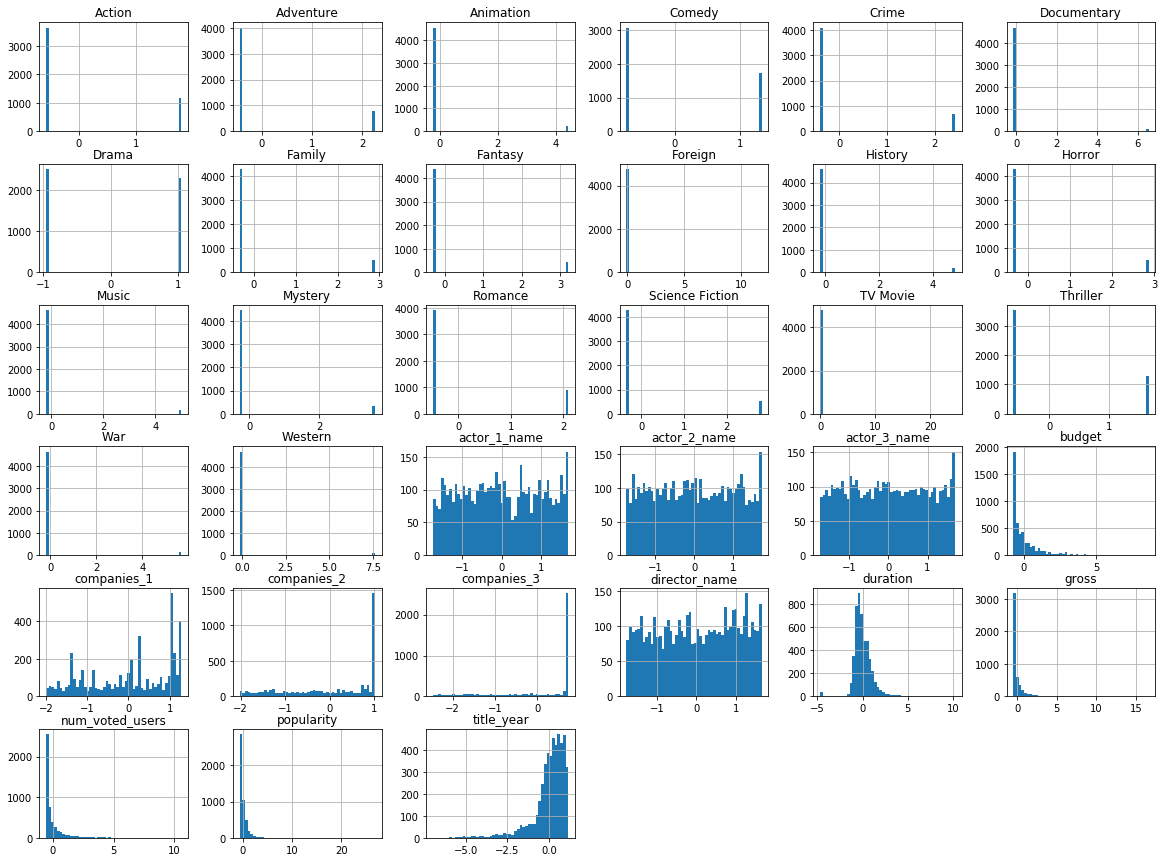

In [40]:
%matplotlib inline
clean_data_set.hist(bins=50,figsize=(20,15))
plt.show()

In [62]:
clean_data_set['nice'] = nice_column

In [63]:
clean_data_set.head()

,budget,popularity,gross,duration,num_voted_users,title_year,director_name,actor_1_name,actor_2_name,actor_3_name,...,Romance,Horror,Mystery,History,War,Music,Documentary,Foreign,TV Movie,nice
0,5.107181,4.053183,16.615709,2.438596,8.999729,0.526213,-0.480838,1.148212,1.710379,1.289070,...,-0.478229,-0.348064,-0.27949,-0.20681,-0.175806,-0.200152,-0.153099,-0.084436,-0.040846,1
1,6.654402,3.696258,5.396331,2.748263,3.086200,0.365076,-0.649452,-0.116096,0.826611,0.123064,...,-0.478229,-0.348064,-0.27949,-0.20681,-0.175806,-0.200152,-0.153099,-0.084436,-0.040846,1
2,5.303653,2.699638,4.903054,1.819260,3.058657,1.009625,1.097744,-1.024816,-1.153637,0.384027,...,-0.478229,-0.348064,-0.27949,-0.20681,-0.175806,-0.200152,-0.153099,-0.084436,-0.040846,1
3,5.426449,2.854798,6.157440,2.571310,6.817394,0.767919,-1.243964,-1.153223,0.583511,-0.632063,...,-0.478229,-0.348064,-0.27949,-0.20681,-0.175806,-0.200152,-0.153099,-0.084436,-0.040846,1
4,5.672039,0.705198,1.239734,1.111448,1.161467,0.767919,-1.632068,1.416548,0.349275,1.166917,...,-0.478229,-0.348064,-0.27949,-0.20681,-0.175806,-0.200152,-0.153099,-0.084436,-0.040846,1


### Корреляция

In [64]:
corr_matrix = clean_data_set.corr()

In [65]:
corr_matrix["nice"].sort_values(ascending=False) 

nice               1.000000
duration           0.304372
num_voted_users    0.252808
Drama              0.244391
popularity         0.211466
gross              0.163047
History            0.112426
War                0.087326
Crime              0.066535
Music              0.054356
Documentary        0.050325
budget             0.035926
Mystery            0.031368
Animation          0.028805
Western            0.025831
Romance            0.023815
Foreign            0.022551
actor_3_name       0.014963
actor_1_name       0.009964
director_name      0.007537
TV Movie          -0.016421
Adventure         -0.017386
companies_3       -0.025096
actor_2_name      -0.029793
Family            -0.037299
Fantasy           -0.040506
companies_2       -0.040591
companies_1       -0.041067
Science Fiction   -0.041468
Thriller          -0.051529
Action            -0.064225
Comedy            -0.132650
Horror            -0.151625
title_year        -0.167973
Name: nice, dtype: float64

In [66]:
clean_data_set.shape

(4803, 34)

### Отношение классов

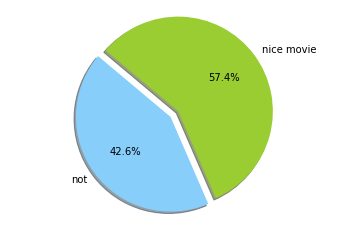

In [67]:
labels =["not","nice movie"]
sizes = clean_data_set['nice'].value_counts(sort = False)
colors = ["lightskyblue","yellowgreen"]
explode = (0.1,0)  # explode 1st slice
 

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140,)
plt.axis('equal')
plt.show()


In [68]:
clean_data_set.to_csv('datasets/tmdb-movie-metadata/clean_tmdb.csv', index=False)